In [1]:
# Import libraries.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from foundation_model.utils.interpolate import InterpSmooth

# Load Stable DoS data.
dos_stable = pd.read_pickle("../raw/MP_dos_stable_energy_20240421.xz")

# Get metal data only.
dos_metal = dos_stable[dos_stable.is_metal].reset_index(drop=True)

dos_metal

2025-06-03 03:12:59.189 | INFO     | __init__:<module>:34 - Loguru logger initialized for foundation_model package.


,material_id,reduced_formula,chemical_system,gap,efermi,is_stable,is_metal,density,energy
0,mp-569794,Ta,Ta,0.0,5.264594,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-31.3333, -31.3103, -31.2873, -31.2643, -31.2..."
1,mp-62,Pa,Pa,0.0,13.102635,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-31.2563, -31.2271, -31.1979, -31.1687, -31.1..."
2,mp-582819,Pu,Pu,0.0,14.873514,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-35.0145, -34.9817, -34.9489, -34.9161, -34.8..."
3,mp-1018134,Li,Li,0.0,-0.229226,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-49.7156, -49.6826, -49.6496, -49.6166, -49.5..."
4,mp-1184115,Er,Er,0.0,3.025970,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-24.2646, -24.2385, -24.2123, -24.1862, -24.1..."
...,...,...,...,...,...,...,...,...,...
13684,mp-1214324,BaSmFeCuO5,Ba-Cu-Fe-O-Sm,0.0,2.925980,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-71.5295, -71.4786, -71.4277, -71.3768, -71.3..."
13685,mp-556333,K2ZnCu3P3O12F,Cu-F-K-O-P-Zn,0.0,2.004674,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-72.4215, -72.1095, -71.7976, -71.4856, -71.1..."
13686,mp-1200471,CsV3B2P4(H4O11)2,B-Cs-H-O-P-V,0.0,3.041387,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-40.0706, -40.041, -40.0115, -39.9819, -39.95..."
13687,mp-559534,Ba5Al2In2IrClO13,Al-Ba-Cl-In-Ir-O,0.0,3.472713,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-24.9619, -24.8218, -24.6817, -24.5416, -24.4..."


In [2]:
### Exclusion of outliers.
thd = 500
density_max = np.array([max(d) for d in dos_metal.density])
survive = density_max < thd
dos_metal = dos_metal.iloc[survive].reset_index(drop=True)
dos_metal

,material_id,reduced_formula,chemical_system,gap,efermi,is_stable,is_metal,density,energy
0,mp-569794,Ta,Ta,0.0,5.264594,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-31.3333, -31.3103, -31.2873, -31.2643, -31.2..."
1,mp-62,Pa,Pa,0.0,13.102635,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-31.2563, -31.2271, -31.1979, -31.1687, -31.1..."
2,mp-582819,Pu,Pu,0.0,14.873514,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-35.0145, -34.9817, -34.9489, -34.9161, -34.8..."
3,mp-1018134,Li,Li,0.0,-0.229226,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-49.7156, -49.6826, -49.6496, -49.6166, -49.5..."
4,mp-1184115,Er,Er,0.0,3.025970,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-24.2646, -24.2385, -24.2123, -24.1862, -24.1..."
...,...,...,...,...,...,...,...,...,...
10721,mp-1043874,CaLaFeNiO6,Ca-Fe-La-Ni-O,0.0,4.805851,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-63.4844, -63.3425, -63.2006, -63.0587, -62.9..."
10722,mp-1228257,Ba2YCu3PbO7,Ba-Cu-O-Pb-Y,0.0,3.929532,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-70.4211, -70.3714, -70.3218, -70.2721, -70.2..."
10723,mp-1214324,BaSmFeCuO5,Ba-Cu-Fe-O-Sm,0.0,2.925980,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-71.5295, -71.4786, -71.4277, -71.3768, -71.3..."
10724,mp-556333,K2ZnCu3P3O12F,Cu-F-K-O-P-Zn,0.0,2.004674,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-72.4215, -72.1095, -71.7976, -71.4856, -71.1..."


In [5]:
start, end = -6.5, 10.5

x_new = np.linspace(start + 0.5, end - 0.5, 500)  # pre-selected range = (-6,5, 10.5).
y_new_list = []
y_new_normal_list = []

for id_, data in dos_metal.iterrows():
    x, y = data.energy - data.efermi, data.density
    mask = (x >= start) & (x <= end)
    x, y = x[mask], y[mask]

    interp = InterpSmooth(x, y, smooth_method="savgol")
    y_sgol = interp(x_new, s_factor=0.9)
    y_sgol_norm = interp(x_new, s_factor=0.9, normalize=True)

    y_new_list.append(y_sgol.tolist())
    y_new_normal_list.append(y_sgol_norm.tolist())

dos_metal_processed = dos_metal.rename(columns={"density": "density_raw", "energy": "energy_raw"})
dos_metal_processed = dos_metal_processed.assign(
    energy=[x_new.tolist()] * dos_metal_processed.shape[0],
    density=y_new_list,
    density_norm=y_new_normal_list,
).set_index("material_id")

# dos_metal_processed.to_pickle("../dos_metal_processed_20240421.pd.xz")
dos_metal_processed

,reduced_formula,chemical_system,gap,efermi,is_stable,is_metal,density_raw,energy_raw,energy,density,density_norm
material_id,,,,,,,,,,,
mp-569794,Ta,Ta,0.0,5.264594,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-31.3333, -31.3103, -31.2873, -31.2643, -31.2...","[-6.0, -5.967935871743487, -5.935871743486974,...","[3.8305082005934974, 3.91122466485653, 3.98838...","[0.06207567864762862, 0.06338373727452008, 0.0..."
mp-62,Pa,Pa,0.0,13.102635,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-31.2563, -31.2271, -31.1979, -31.1687, -31.1...","[-6.0, -5.967935871743487, -5.935871743486974,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
mp-582819,Pu,Pu,0.0,14.873514,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-35.0145, -34.9817, -34.9489, -34.9161, -34.8...","[-6.0, -5.967935871743487, -5.935871743486974,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
mp-1018134,Li,Li,0.0,-0.229226,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-49.7156, -49.6826, -49.6496, -49.6166, -49.5...","[-6.0, -5.967935871743487, -5.935871743486974,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
mp-1184115,Er,Er,0.0,3.025970,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-24.2646, -24.2385, -24.2123, -24.1862, -24.1...","[-6.0, -5.967935871743487, -5.935871743486974,...","[0.014712959511100252, 0.007685369746201719, 0...","[0.002686972062686382, 0.001403549964497584, 0..."
...,...,...,...,...,...,...,...,...,...,...,...
mp-1043874,CaLaFeNiO6,Ca-Fe-La-Ni-O,0.0,4.805851,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-63.4844, -63.3425, -63.2006, -63.0587, -62.9...","[-6.0, -5.967935871743487, -5.935871743486974,...","[0.3337029097372715, 0.30308036841495933, 0.27...","[0.07206388605970865, 0.06545088010645746, 0.0..."
mp-1228257,Ba2YCu3PbO7,Ba-Cu-O-Pb-Y,0.0,3.929532,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-70.4211, -70.3714, -70.3218, -70.2721, -70.2...","[-6.0, -5.967935871743487, -5.935871743486974,...","[4.340802849988368, 4.072350033078989, 3.82806...","[0.20129023739989788, 0.188841634430863, 0.177..."
mp-1214324,BaSmFeCuO5,Ba-Cu-Fe-O-Sm,0.0,2.925980,True,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-71.5295, -71.4786, -71.4277, -71.3768, -71.3...","[-6.0, -5.967935871743487, -5.935871743486974,...","[1.4751833509508658, 1.9804654957559684, 2.455...","[0.10666833683757038, 0.14320454502168503, 0.1..."


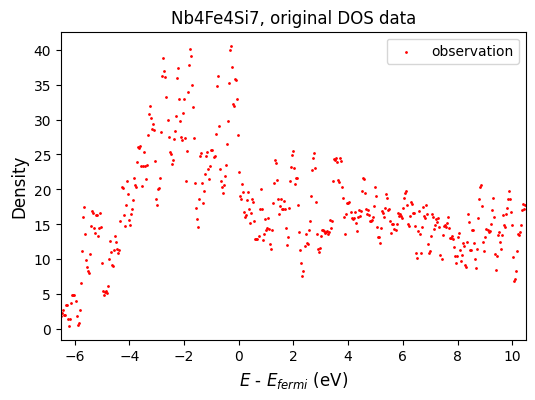

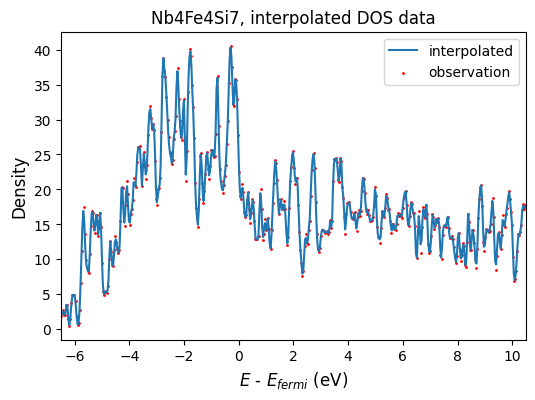

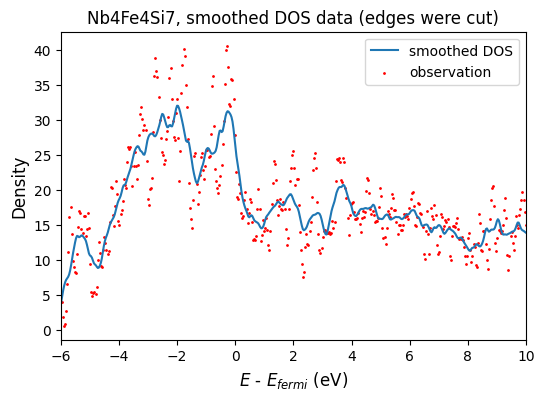

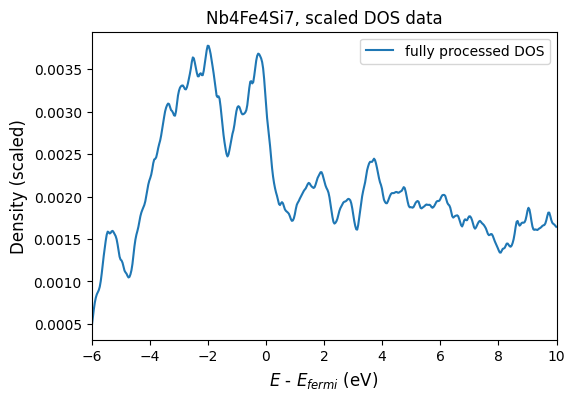

In [ ]:
# Visualization of smoothing process of DOS data.
i = 5236

target_formula = dos_processed.iloc[i]["reduced_formula"]

y = dos_metal[dos_metal.reduced_formula == target_formula]["density"].values[0]
x = (
    dos_metal[dos_metal.reduced_formula == target_formula]["energy"].values[0]
    - dos_metal[dos_metal.reduced_formula == target_formula]["efermi"].values[0]
)
range_x = (-6.5 <= x) & (10.5 >= x)
range_x2 = (-6.0 <= x) & (10.0 >= x)

# Original DOS data.
fig = plt.figure(figsize=(6, 4))
plt.title(f"{target_formula}, original DOS data")
plt.scatter(x[range_x], y[range_x], color="red", s=1, label="observation")
plt.legend()
plt.xlim(-6.5, 10.5)
plt.xlabel("$E$ - $E_{fermi}$ (eV)", fontsize="large")
plt.ylabel("Density", fontsize="large")
plt.show()

# Interpolated DOS data.
fig = plt.figure(figsize=(6, 4))
plt.title(f"{target_formula}, interpolated DOS data")
plt.plot(energy, density[i], label="interpolated")
plt.scatter(x[range_x], y[range_x], color="red", s=1, label="observation")
plt.legend()
plt.xlim(-6.5, 10.5)
plt.xlabel("$E$ - $E_{fermi}$ (eV)", fontsize="large")
plt.ylabel("Density", fontsize="large")
plt.show()

# DOS after smoothing (+ edges were cut).
fig = plt.figure(figsize=(6, 4))
plt.title(f"{target_formula}, smoothed DOS data (edges were cut)")
plt.plot(energy_cut, density_cut[i], label="smoothed DOS")
plt.scatter(x[range_x2], y[range_x2], color="red", s=1, label="observation")
plt.legend()
plt.xlim(-6, 10)
plt.xlabel("$E$ - $E_{fermi}$ (eV)", fontsize="large")
plt.ylabel("Density", fontsize="large")
plt.show()

# DOS after smoothing and scaling.
fig = plt.figure(figsize=(6, 4))
plt.title(f"{target_formula}, scaled DOS data")
plt.plot(energy_cut, density_scaled[i], label="fully processed DOS")
plt.legend()
plt.xlim(-6, 10)
plt.xlabel("$E$ - $E_{fermi}$ (eV)", fontsize="large")
plt.ylabel("Density (scaled)", fontsize="large")
plt.show()